# Teorema Central do Limite
___

Sejam $X_1, X_2, ..., X_n$ uma sequência de v.a. i.i.d. retiradas de uma população com média $\mu$ e variância $\sigma^2$ (variância finita). A distribuição amostral de $\bar{X}$ aproxima-se, para $n$ grande i.e. número de amostras é grande, de uma distribuição normal com média $\mu$ e variância $\sigma^2/n$. Isto é:

$$ P \big\{ \frac{X_1+X_2+...+X_n-n\mu}{\sigma \sqrt{n}} \le \alpha \big\} $$

$$ \to \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{a} e^{-x^2/2} dx, \ as \ n \to \infty $$

Define-se também:

$$ Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \approx N(\mu=0, \sigma²=1) $$


Ademais, para uma v.a. com $E[X] = \mu$ e $V[X] = \sigma^2$, considerando a média amostral $\bar{X}$ de uma amostra com tamanho $n$:
- $E[\bar{X}] =  \mu$ é um estimador não viesado i.e. $E[\hat{\theta}] = \theta$
- $V[\bar{X}] = \sigma^2/n$ é um estimador viesado, e $V[\bar{X}] \to 0$ quando $n \to \infty$

Lembrando que estimadores são estatísticas utilizadas para inferir o valor de um parâmetro da população.

Referências: [[1]](https://www.amazon.com/Introduction-Probability-Models-Sheldon-Ross/dp/0123756863#:~:text=Introduction%20to%20Probability%20Models%2C%20Tenth,probability%20theory%20and%20stochastic%20processes.&text=The%20book%20begins%20by%20introducing,conditional%20probability%2C%20and%20conditional%20expectation.), [[2]](https://www.youtube.com/watch?v=QcQz6_93GC4&list=PLSc7xcwCGNh3Ls-WARhH54WwiqB91Kyak&index=18&ab_channel=FranciscoRodrigues).

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Nota-se pela representação da variação da média amostral $\bar{X}$ e da variância $\sigma^2$ em função do número de amostras $n$ que, com um maior número de amostras, a média tende ao valor esperado exposto acima, enquanto a variância se reduz a aproximadamente zero.

Dentre as distribuições para escolha:

- Normal padronizada, com $\mu$ = 0 e $\sigma^2$ = 1
- Exponencial, com $\alpha$ = 3
- Poisson, com $\lambda$ = $\frac{1}{3}$

PS: valores escolhidos arbitrariamente, lembrando que para a distribuição exponencial, $E[X]=\frac{1}{\alpha}$ e $V[X]=\frac{1}{\alpha²}$, e para a distribuição de Poisson, $E[X] = V[X] = \lambda$.

Selecione o tipo de distribuição:
1 - Distribuição normal 
2 - Distribuição exponencial 
3 - Distribuição de Poisson

1


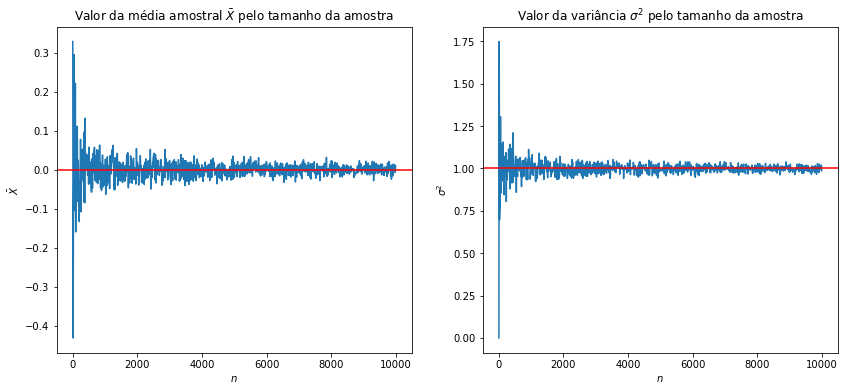

In [10]:
# estatísticas
mu = 0 
sigma = 1 
lbd = 1/3

vn = []
vmean = []
vstd = []

# escolha da distribuição
print('Selecione o tipo de distribuição:'
     '\n1 - Distribuição normal',
     '\n2 - Distribuição exponencial',
     '\n3 - Distribuição de Poisson\n')
case = int(input())

# simulação
for n in np.arange(1,10000,10):
    if case == 1: 
        X = np.random.normal(mu, sigma, n)
    elif case == 2:
        X = np.random.exponential(1/lbd, n)
    elif case == 3:
        X = np.random.poisson(lbd, n)
        
    vmean.append(np.mean(X))
    vstd.append(np.var(X))
    vn.append(n)

    
# plot
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(14,6))
ax0.plot(vn, vmean)
ax1.plot(vn, vstd)
if case == 1:
    ax0.axhline(y=mu, color='r')
    ax1.axhline(y=sigma, color='r')
elif case == 2:
    ax0.axhline(y=1/lbd, color='r')
    ax1.axhline(y=1/(lbd**2), color='r')
elif case == 3:
    ax0.axhline(y=lbd, color='r')
    ax1.axhline(y=lbd, color='r')

ax0.set(xlabel=r'$n$', ylabel=r'$\bar{X}$', title=r'Valor da média amostral $\bar{X}$ pelo tamanho da amostra')
ax1.set(xlabel=r'$n$', ylabel=r'$\sigma^{2}$', title=r'Valor da variância $\sigma^2$ pelo tamanho da amostra')
plt.show()

Representação do **Teorema Central do Limite** para diferentes distribuições (uniforme, exponencial e Poisson). 

Nota-se que, independente da distribuição original, com o aumento do número de amostras, a distribuição se aproxima de uma distribuição normal, como apresentado no início pelo Teorema Central do Limite.

Selecione o tipo de distribuição:
1 - Distribuição uniforme 
2 - Distribuição exponencial 
3 - Distribuição de Poisson

1


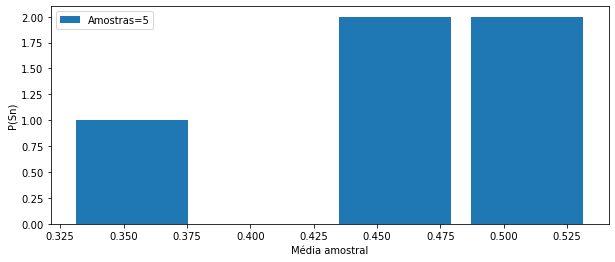

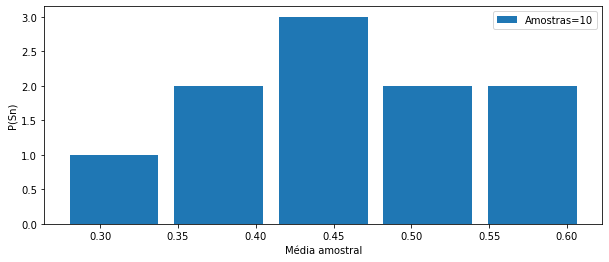

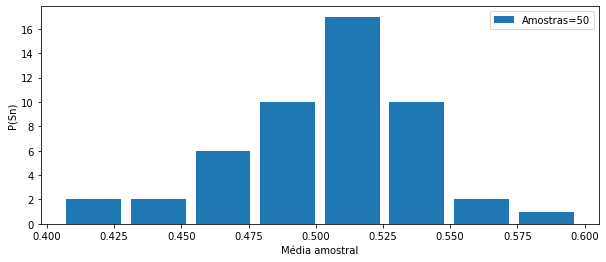

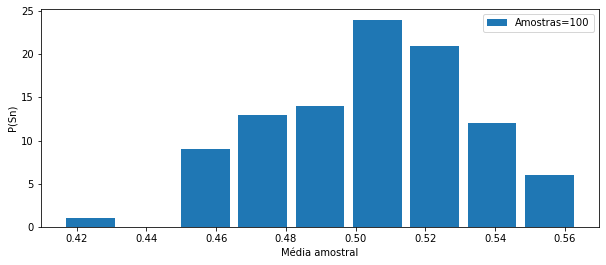

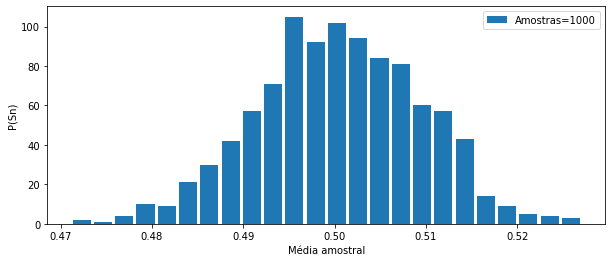

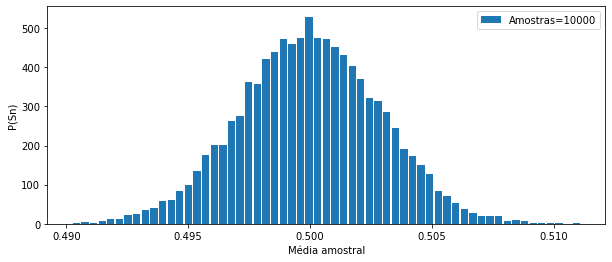

In [19]:
vNs = [5, 10, 50, 100, 1000, 10000] # número de amostras
N = 100 # número de valores em cada amostra

# escolha da distribuição
print('Selecione o tipo de distribuição:'
     '\n1 - Distribuição uniforme',
     '\n2 - Distribuição exponencial',
     '\n3 - Distribuição de Poisson\n')
case = int(input())

# simulação
for Ns in vNs:
    vmean = []
    for s in range(Ns):
        if case == 1: 
            X = np.random.uniform(0, 1, Ns)
        elif case == 2:
            X = np.random.exponential(1/lbd, Ns)
        elif case == 3:
            X = np.random.poisson(lbd, Ns)
            
        vmean.append(np.mean(X))
    
    plt.figure(figsize=(10,4))
    plt.hist(vmean, bins='auto',rwidth=0.85, label='Amostras={}'.format(Ns))
    plt.legend()
    plt.xlabel('Média amostral')
    plt.ylabel('P(Sn)')
    
plt.show()